In [13]:
import torchvision
import numpy as np
import json
import torch
import torchvision.models.detection as detection
from torchvision import models, transforms

model_resnet = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

In [14]:
train_image_ids_map = 'data/train_image_id_mapping.json'
test_image_ids_map = 'data/test_image_id_mapping.json'
train_embeddings_load_path = 'data/embeddings/images/train_image_embeddings_resnet50.npy'
test_embeddings_load_path = 'data/embeddings/images/test_image_embeddings_resnet_50.npy'

In [15]:
images_representation = np.load(train_embeddings_load_path, allow_pickle=True).astype(np.float16)
# images_representation = torch.from_numpy(images_representation).float()
print("Successfully loaded train image embeddings with shape ", images_representation.shape)
with open(train_image_ids_map, 'r') as f:
    images_id = json.load(f)
    print("Successfully loaded train image ids with length ", len(images_id))

Successfully loaded train image embeddings with shape  (120635, 2048)
Successfully loaded train image ids with length  83830


In [19]:
from PIL import Image

model_resnet.eval()
# x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]

# x = np.load('/home/raj/code/mml/LatentAlignmentProcedural/data/images/train/images-qa/zucchini-spaghetti_9_0.jpg')

img = Image.open('/home/raj/code/mml/LatentAlignmentProcedural/data/images/train/images-qa/zucchini-spaghetti_9_0.jpg')
img = img.resize((224, 224))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
# img = img.to(device)

if img.shape[-3] == 1:
    img = img.repeat(1, 3, 1, 1)
if img.shape[-3] > 3:
    img = img[:, :3, :, :]


predictions = model_resnet(img)

In [26]:
print(predictions[0]['labels'])

tensor([51, 47, 51, 86, 62, 81, 31, 62, 79, 61, 67, 31, 61, 81, 79, 62, 51, 44,
         1, 62, 62, 67, 50, 62])


In [ ]:
import os, json, time
import numpy as np
import torch
from torchvision import models, transforms
from torchvision.models.resnet import resnet50, ResNet50_Weights
from PIL import Image

# weights = ResNet50_Weights.DEFAULT
# model = resnet50(weights=weights)
# model = torch.nn.Sequential(*(list(model.children())[:-1]))
# model.cuda()

# Load the pre-trained model
def load(img):
    img = img.resize((224, 224))
    img = transforms.ToTensor()(img)
    img = img.unsqueeze(0)

    if img.shape[-3] == 1:
        img = img.repeat(1, 3, 1, 1)
    if img.shape[-3] > 3:
        img = img[:, :3, :, :]
    img = img.cuda()
    return model(img)

def load1(img):
    img = img.resize((224, 224))
    img = transforms.ToTensor()(img)
    img = img.unsqueeze(0)

    if img.shape[-3] == 1:
        img = img.repeat(1, 3, 1, 1)
    if img.shape[-3] > 3:
        img = img[:, :3, :, :]
    img = img.cuda()
    return model_resnet(img)

def get_embedding_shape_from_json(file: str) -> tuple:
    with open(file, 'r') as f:
        image_id_maps = json.load(f)
    shape = (max(image_id_maps.values()) + 1, 2048)
    return shape

def process_images(base_img_dir: str, json_file : str, save_file_path: str = 'data/embeddings/images/test_image_embeddings.npy') -> int:
    # Dictionary to hold image ID and its corresponding embedding
    start_time = time.time()
    with open(json_file, 'r') as f:
        image_id_maps = json.load(f)

    embedding_shape = get_embedding_shape_from_json(json_file)
    embeddings = np.zeros(embedding_shape, dtype=np.float16)

    cnt = 0
    # print(image_id_maps.items())
    for img_path, img_id in image_id_maps.items():
        # print(img_path, img_id)
        # break
        img = Image.open(base_img_dir + img_path)

        embedding = load(img)
        embedding = embedding.squeeze().detach().cpu().numpy()
        # print(embedding.shape)
        embeddings[img_id] = embedding

        if cnt % 500 == 0:
            print(f'Processed {cnt} images; Saving embeddings...')
            np.save(save_file_path, embeddings)
        # if cnt == 10:
        #     break
        cnt += 1
    # print(embeddings.keys())
    # np.save(save_file_path, embeddings)
    # print("Successfully saved all the embeddings to ", save_file_path)
    end_time = time.time()
    print(f'Processing time: {end_time- start_time}')
    # ~ 1094.6 s for 10000 images on CPU
    return end_time - start_time


train_images_dir = 'data/images/train/images-qa/'
train_image_ids_map = 'data/train_image_id_mapping.json'
train_embeddings_path = 'data/embeddings/images/train_image_embeddings.npy'

test_images_dir = 'data/images/test/images-qa/'
test_image_ids_map = 'data/test_image_id_mapping.json'
test_embeddings_path = 'data/embeddings/images/test_image_embeddings.npy'

# embeddings = process_images(base_img_dir='data/images/test/images-qa/', json_file='data/test_image_id_mapping.json', save_file_path='data/embeddings/images/test_image_embeddings.npy')
# embeddings = process_images(base_img_dir=train_images_dir, json_file=train_image_ids_map, save_file_path=train_embeddings_path)

# print(get_embedding_shape_from_json('data/train_image_id_mapping.json'))







In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')

lines = 'lines is some string of words'
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(lines)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

print(nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/raj/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['lines', 'string', 'words']


[0.00012257865, -0.003004324, 0.002570463, 0.0051763332, 0.017517718, 0.023326332, 0.006350399, 0.00012257865, 0.0017493846, 0.004974186, 0.005644125, 0.004545274, 0.00414022, 0.006350399, 0.0084960945, 0.008220842, 0.01756886, 0.0123233795, 0.008763029, 0.009900552, 0.010667593, 0.009793656, -0.0034693715, 0.0010957036, 0.025710782, 0.012257121, 0.001185689, 0.0021841875, 0.012127055, 0.0058051012, 0.0033099214, -0.0045825643, 0.012597891, 0.00017561391, 0.011679329, 0.014882984, 0.00874425, 0.0069976742, 0.007976613, 0.0026098778, 0.011518726, 0.001185689, 0.0016446601, 0.0081735365, 0.006350399, 0.001185689, 0.011627351, 0.008354557, 0.0056869555, 0.0082838135, -0.0002106363, -0.0021113786, 0.004255775]
[0.010040076, 0.015245055, 0.010212401, 0.013404995, 0.0149070425, -0.0018475566, -0.0019528264, 0.0011876831, 0.006909883, 0.0028664388, -0.0018475566, -0.0032630642, 0.0056238463, 0.0056238463, 0.019041715, 0.011836884, 0.015875367, 0.0022753454, 0.0035931394, 0.007660623, 0.007401

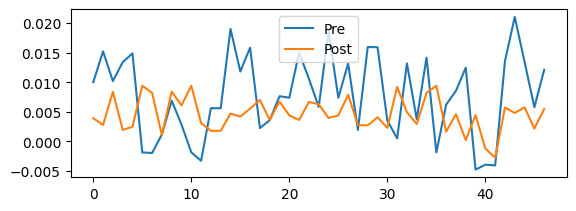

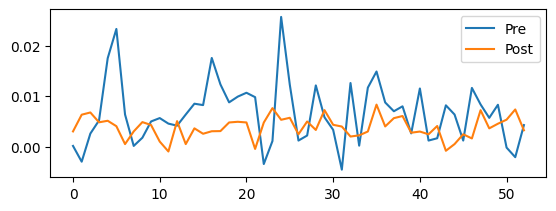

In [5]:
import numpy as np
import random
correct_answers = []
wrong_answers = []
pre_similarity_wrong = []
pre_similarity_correct = []
post_similarity_wrong = []
post_similarity_correct = []

filename = 'outputs/log_3.txt'
with open(filename, 'r') as f:
    lines = f.readlines()[22:]
    for i in range(0, len(lines)-2, 7):
        line_ = lines[i:i+7]
        sample_number = line_[0].split(':')[-1].strip()
        sample_id = line_[1].split(':')[-1].strip()
        string = line_[5][:-1]
        # print(string, type(string))
        pre_similarity = float(line_[6].split()[0].strip())
        post_similarity = float(line_[6].split()[1].strip())
        if (string.startswith('correct')):
            correct_answers.append(sample_number)
            pre_similarity_correct.append(pre_similarity)
            post_similarity_correct.append(post_similarity)
        else:
            wrong_answers.append(sample_number)
            pre_similarity_wrong.append(pre_similarity)
            post_similarity_wrong.append(post_similarity)
        
print(pre_similarity_wrong)
print(pre_similarity_correct)

print(post_similarity_wrong)
print(post_similarity_correct)

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(pre_similarity_correct, label='Pre')
plt.plot(post_similarity_correct, label='Post')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(pre_similarity_wrong, label='Pre')
plt.plot(post_similarity_wrong, label='Post')
plt.legend()
plt.show()

In [43]:
pre_similarity_wrong = np.array(pre_similarity_wrong)
pre_similarity_correct = np.array(pre_similarity_correct)
post_similarity_wrong = np.array(post_similarity_wrong)
post_similarity_correct = np.array(post_similarity_correct)


print(np.mean(post_similarity_correct - pre_similarity_correct)*1.5)
print(np.mean(post_similarity_wrong - pre_similarity_wrong)*1.5)

avg = len(post_similarity_correct) * np.mean(post_similarity_correct - pre_similarity_correct) + len(post_similarity_wrong) * np.mean(post_similarity_wrong - pre_similarity_wrong)
avg /= len(pre_similarity_correct) + len(pre_similarity_wrong)
print(avg*1.5)

0.12351061909832592
0.1324473263152151
0.12896201050062833


[0.026476268, 0.011982684, 0.012455394, 0.02209302, 0.02689822, 0.01251365, 0.014791123, 0.005240112, 0.019742649, 0.023812965, 0.02720282, 0.020201046, 0.01867666, 0.015034452, 0.024988184, 0.004581625, 0.021653807, 0.023064723, 0.023605248, 0.017800773, 0.020611057, 0.019614784, 0.010902666, 0.0126643265, 0.026457623, 0.021088524, 0.010008526, 0.023237245, 0.020402545, 0.021649603, 0.01837126, 0.015581444, 0.007498957, 0.01837126, 0.013600551, 0.016511336, 0.02201384, 0.015034452, 0.024421496, 0.028620357, 0.011165061, 0.020201046, 0.011779899, 0.01845743, 0.012312302, 0.029249117, 0.018984437, 0.023539614, 0.020477446, 0.02089193, 0.010288994, 0.024755836, 0.013584577, 0.020662328, 0.015066509, 0.02064269, 0.014076421, 0.020477446, 0.020340314, 0.019850122, 0.02541635, 0.021828381]
[0.01980161, 0.015682163, 0.01929953, 0.017112197, 0.011239701, 0.021353478, 0.024106286, 0.0072217155, 0.019307425, 0.018929102, 0.013977289, 0.013291671, 0.017080352, 0.014138642, 0.015682163, 0.0231436

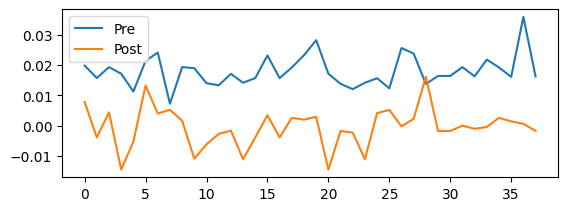

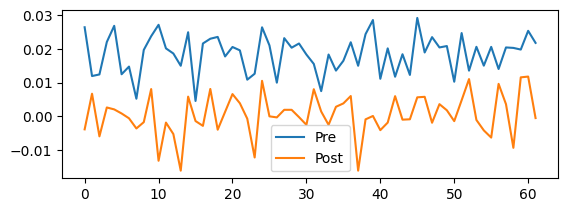

In [4]:
import numpy as np
import random
correct_answers = []
wrong_answers = []
pre_similarity_wrong = []
pre_similarity_correct = []
post_similarity_wrong = []
post_similarity_correct = []

filename = 'outputs/log_4.txt'
with open(filename, 'r') as f:
    lines = f.readlines()[22:]
    for i in range(0, len(lines)-2, 7):
        line_ = lines[i:i+7]
        sample_number = line_[0].split(':')[-1].strip()
        sample_id = line_[1].split(':')[-1].strip()
        string = line_[5][:-1]
        # print(string, type(string))
        pre_similarity = float(line_[6].split()[0].strip())
        post_similarity = float(line_[6].split()[1].strip())
        if (string.startswith('correct')):
            correct_answers.append(sample_number)
            pre_similarity_correct.append(pre_similarity)
            post_similarity_correct.append(post_similarity)
        else:
            wrong_answers.append(sample_number)
            pre_similarity_wrong.append(pre_similarity)
            post_similarity_wrong.append(post_similarity)
        
print(pre_similarity_wrong)
print(pre_similarity_correct)

print(post_similarity_wrong)
print(post_similarity_correct)

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(pre_similarity_correct, label='Pre')
plt.plot(post_similarity_correct, label='Post')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(pre_similarity_wrong, label='Pre')
plt.plot(post_similarity_wrong, label='Post')
plt.legend()
plt.show()

In [46]:
pre_similarity_wrong = np.array(pre_similarity_wrong)
pre_similarity_correct = np.array(pre_similarity_correct)
post_similarity_wrong = np.array(post_similarity_wrong)
post_similarity_correct = np.array(post_similarity_correct)


avg = len(post_similarity_correct) * np.mean(post_similarity_correct - pre_similarity_correct) + len(post_similarity_wrong) * np.mean(post_similarity_wrong - pre_similarity_wrong)
avg /= len(pre_similarity_correct) + len(pre_similarity_wrong)
print(avg*1.5)

0.1609463800619198
